# Migros technical interview

## Main tasks:

1. Analyze the data, show us what you would do to understand it and what to do to make it more usable or meaningful. 
Explain us how you interpret the results. You are free to use any (open source) industry standard tools you like.

2. How would you derive insights? 
What would be important if you would implement a monitoring for this?
What would make your dashboard most useful?

3. Describe and if time work on a model you would choose to provide a website personalization/segmentation solution and tell us why. 
Define your own goal for your approach.

## Approach:

1. Analyze the data, show us what you would do to understand it and what to do to make it more usable or meaningful. 

 - Exploratory data analysis
     - Data Collection
     - Data Cleaning
     - Univariate Analysis
     - Bivariate Analysis


**Exploratory data analysis**

Data Collection

In [6]:
# Importing all necessary modules.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# Reading data as a pandas data frame.
# We have three tables: data_sample, products, person.

sheet_id = '1CrIcItzuVRaYz3g2V6adq7D1flsGM6zbVp9YS4mJz3s' 

sheet_name1 = 'data_sample'
sheet_name2 = 'products'
sheet_name3 = 'person'

#url1 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name1}"

data_sample=pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={'data_sample'}")
products=pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={'products'}")
person=pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={'person'}")

In [8]:
# Printing data_sample
data_sample.head()

,transactions,loyalty,days_since_last_contact,gender,person_id,product_ids,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,4,-1.33,2,m,170636bb-3601-4a18-b572-52650c0d2d0e,"[7881,10834,61603,62040,63288,125830]",1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,-0.28,3,m,2a4c9697-b937-4429-9fd3-5529929a1ab9,"[10834,61603,62040,63288,125830]",1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,-0.22,1,w,4d12441d-3748-4b05-81bf-fd24f9f9d6f4,"[63288,125830]",1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,-0.29,0,m,00f173be-96b1-4407-809c-6882e5bbb1fd,"[7881,10834]",0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.06,5,m,f5aa1643-398f-4027-ab75-7b72ebe92d90,"[7881,10834,62040,63288,125830]",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Printing products
products.head()

,id,name,category_level_1,region,stock_level,is_seasonal,productdata_language
0,7881,mango,fruits,1,0,True,DE
1,10834,ovomaltine schokolade,sweets,2,3,False,DE
2,61603,nutella,sweets,2,3,False,DE
3,63288,birnen,fruits,1,0,True,DE
4,125830,karotten,vegetables,1,1,False,DE


In [10]:
# Printing person
person.head()

,id,gender,first_order,last_order,predicted_clv,zip_code,cookie_1,cookie_2,cookie_3,e_mail
0,170636bb-3601-4a18-b572-52650c0d2d0e,m,undefined,undefined,undefined,undefined,iv0d8h8IRkCFxAqNXKHaLA==,NaN,Yy6vow/IWUiDD/FCIl5wUw==,n6awBQIoFkym20K9K8c4iQ==
1,2a4c9697-b937-4429-9fd3-5529929a1ab9,m,undefined,undefined,undefined,undefined,uMm7PkqrAE2OOvNdL2uGjA==,NaN,LLaX27gdOUivdQ/weZlXnQ==,4eOEQwLL20yrcle5yy4Ddw==
2,4d12441d-3748-4b05-81bf-fd24f9f9d6f4,w,undefined,undefined,undefined,undefined,pNlIOPVQ1ker0r+kr7VPrw==,NaN,do8QyBLWP0K2NLcfwRRKqQ==,tC7tstN03U6OlakzGe5yTw==
3,00f173be-96b1-4407-809c-6882e5bbb1fd,m,undefined,undefined,undefined,undefined,CTAaruMbz0OLQU0HqWf0ng==,NaN,cuY93SKH2UajLAeAcBPUhQ==,0jl7wbx3TUeiwcZ4oaZxyA==
4,f5aa1643-398f-4027-ab75-7b72ebe92d90,m,undefined,undefined,undefined,undefined,lotrcqCqYEKPIlg+0mwKdA==,NaN,EsmihNPEbUeGra8paxL37w==,li0V10eqFkaBDCgv5yRUHw==


Data Cleaning: **data_sample**

We will start our data cleaning and data understanding from the first table - data_sample

In [11]:
# Checking the names of the columns of the data_sample column
data_sample.columns

Index(['transactions', 'loyalty', 'days_since_last_contact', 'gender',
       'person_id', 'product_ids', '0ne.hot.1', '0ne.hot.2', '0ne.hot.3',
       '0ne.hot.4', 'promotion_set_id', 'platform_cookie_source',
       'delivery_pass', 'is_newsletter', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [12]:
# In data_sample table there are some imported columns that have no data. We will remove them.

In [13]:
data_sample = data_sample.drop(columns=['Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'])
data_sample.columns

Index(['transactions', 'loyalty', 'days_since_last_contact', 'gender',
       'person_id', 'product_ids', '0ne.hot.1', '0ne.hot.2', '0ne.hot.3',
       '0ne.hot.4', 'promotion_set_id', 'platform_cookie_source',
       'delivery_pass', 'is_newsletter'],
      dtype='object')

In [14]:
# Checking the size of the dataframe
data_sample.shape

(100, 14)

In [15]:
# Checking the general information about the table.
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
transactions               100 non-null int64
loyalty                    100 non-null float64
days_since_last_contact    100 non-null int64
gender                     97 non-null object
person_id                  100 non-null object
product_ids                100 non-null object
0ne.hot.1                  100 non-null int64
0ne.hot.2                  100 non-null int64
0ne.hot.3                  100 non-null int64
0ne.hot.4                  100 non-null int64
promotion_set_id           100 non-null object
platform_cookie_source     100 non-null object
delivery_pass              100 non-null bool
is_newsletter              100 non-null bool
dtypes: bool(2), float64(1), int64(6), object(5)
memory usage: 9.6+ KB


In [16]:
# Looks like in gender there are some missing values. Checking the missing values
data_sample.isnull().sum()

transactions               0
loyalty                    0
days_since_last_contact    0
gender                     3
person_id                  0
product_ids                0
0ne.hot.1                  0
0ne.hot.2                  0
0ne.hot.3                  0
0ne.hot.4                  0
promotion_set_id           0
platform_cookie_source     0
delivery_pass              0
is_newsletter              0
dtype: int64

In [17]:
# There are 3 missing values in gender. We leave it for a moment.

In [18]:
# Let's check how many unique values in every column. This will help us to understand what variables could be grouped.

for col in data_sample:
    print(col, data_sample[col].nunique())

transactions 13
loyalty 63
days_since_last_contact 12
gender 3
person_id 100
product_ids 6
0ne.hot.1 2
0ne.hot.2 2
0ne.hot.3 2
0ne.hot.4 2
promotion_set_id 100
platform_cookie_source 1
delivery_pass 2
is_newsletter 1


## Data cleaning. Part 2. Data_sample
At this step we could do some modifications in the data and create a table that it will be easier to work with. We can:

    1.'Reverse' one-hot encoding values to "categories"
        At this stage of the analysis it will be easier for us to have the one-hot encoding values as categories in one column.
    2. Calculate the amount of products in the product id and remame the 
    Drop the columns that have 1 variable (not possible to make any analysis, but could be used later for recommendations
    2. Drop the columns that have 100 variable (it means that all the variables are unique - so we cannot use them either)
    3. 

In [19]:
# Saving the original data 

data_sample_orig = data_sample

In [20]:
# Here we see that there are one-hot encoding values. We can reverse them to check thier distribution.
# We will create a series A, B, C and D as another column and call them "categories"

categ_one_hot = data_sample[['0ne.hot.1', '0ne.hot.2', '0ne.hot.3', '0ne.hot.4']]
categ_one_hot = categ_one_hot.idxmax(1)


In [21]:



# Dropping the one-hot encoding data and changing them for the 'reverse' one
# so that we are able to group and analyse them.

# Also dropping the values that have just 1 categorical value in these data like 'platform_cookie_source' and 'is_newsletter' and 
# values that have all different values like 'promotion_set_id', 'person_id'

data_sample=data_sample.drop(['0ne.hot.1', '0ne.hot.2', '0ne.hot.3', '0ne.hot.4'], axis = 1)
data_sample=data_sample.drop(['platform_cookie_source', 'is_newsletter', 'promotion_set_id', 'person_id'], axis = 1)

# Appending the column showing the one-hot encoding data
data_sample['categ_one_hot'] = categ_one_hot

one_hot_coding = {'0ne.hot.1': "cat1", "0ne.hot.2": "cat2" , "0ne.hot.3": "cat3", "0ne.hot.4": "cat4" }

data_sample["categ_one_hot"].replace(one_hot_coding, inplace=True)


data_sample.head()

,transactions,loyalty,days_since_last_contact,gender,product_ids,delivery_pass,categ_one_hot
0,4,-1.33,2,m,"[7881,10834,61603,62040,63288,125830]",True,cat1
1,6,-0.28,3,m,"[10834,61603,62040,63288,125830]",True,cat1
2,5,-0.22,1,w,"[63288,125830]",False,cat1
3,7,-0.29,0,m,"[7881,10834]",True,cat2
4,4,1.06,5,m,"[7881,10834,62040,63288,125830]",True,cat3


In [22]:
data_sample.product_ids.unique()

array(['[7881,10834,61603,62040,63288,125830]',
       '[10834,61603,62040,63288,125830]', '[63288,125830]',
       '[7881,10834]', '[7881,10834,62040,63288,125830]',
       '[7881,10834,61603]'], dtype=object)

In [23]:
data_sample.columns
data_sample.count().count()

7

In [26]:
column_names = ["gender", "loyalty", \
                "days_since_last_contact", "transactions", "product_ids", \
                "categ_one_hot", "delivery_pass"]
len(column_names)

7

In [27]:
data_sample = data_sample.reindex(columns=column_names)
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True
2,w,-0.22,1,5,"[63288,125830]",cat1,False
3,m,-0.29,0,7,"[7881,10834]",cat2,True
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True


In [28]:
data_sample["product_ids_sets"] = data_sample["product_ids"]

product_id_coding = {'[7881,10834,61603,62040,63288,125830]': "A", "[10834,61603,62040,63288,125830]": "B" \
                                                                     , "[63288,125830]": "C", "[7881,10834]": "D" \
                                                                     , "[7881,10834,62040,63288,125830]": "E", "[7881,10834,61603]": "F"}

data_sample["product_ids_sets"].replace(product_id_coding, inplace=True)
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass,product_ids_sets
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True,A
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True,B
2,w,-0.22,1,5,"[63288,125830]",cat1,False,C
3,m,-0.29,0,7,"[7881,10834]",cat2,True,D
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True,E


In [29]:
data_sample["product_ids_sets"].unique()

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=object)

In [30]:
# Check which columns in our table are "objects". 
data_sample.select_dtypes(include=[np.object]).columns

Index(['gender', 'product_ids', 'categ_one_hot', 'product_ids_sets'], dtype='object')

In [31]:
data_sample.dtypes.sort_values()

delivery_pass                 bool
days_since_last_contact      int64
transactions                 int64
loyalty                    float64
gender                      object
product_ids                 object
categ_one_hot               object
product_ids_sets            object
dtype: object

In [32]:
data_sample.dtypes.value_counts()

object     4
int64      2
float64    1
bool       1
dtype: int64

### Univariate Analysis

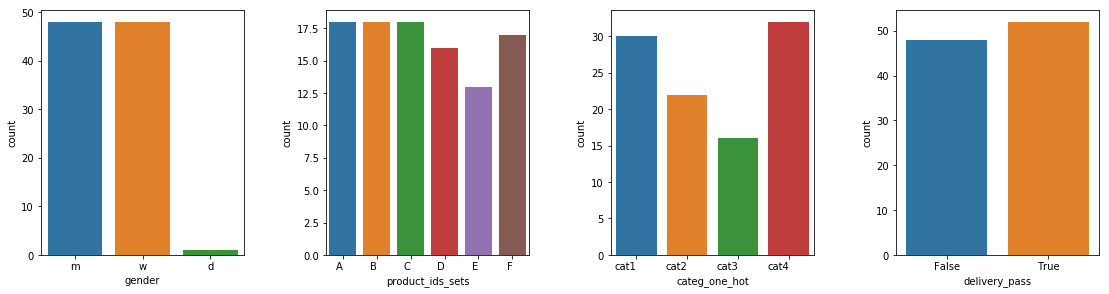

In [33]:
fig, ax =plt.subplots(1,4)
#fig.tight_layout()
ax0 = sns.countplot(data_sample['gender'], ax=ax[0])
ax1 = sns.countplot(data_sample['product_ids_sets'], ax=ax[1])
ax2 = sns.countplot(data_sample['categ_one_hot'], ax=ax[2])
ax3 = sns.countplot(data_sample['delivery_pass'], ax=ax[3])
ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='right')
ax2.set_xticklabels(ax2.get_xticklabels(), horizontalalignment='right')
#ax = sns.countplot(x="gender", data=data_sample)
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=2.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

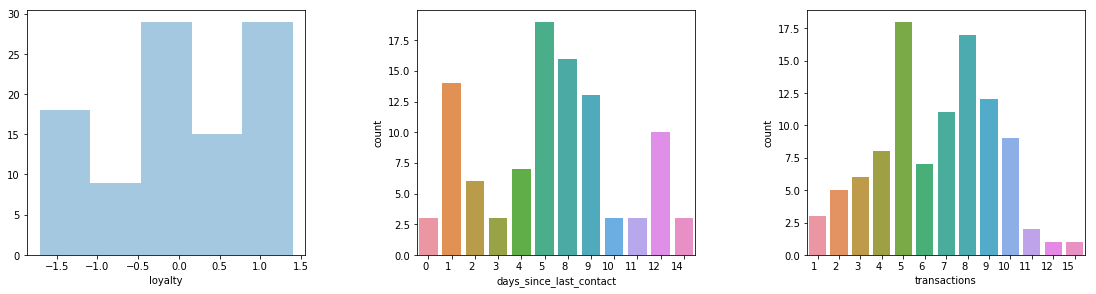

In [35]:
fig, ax =plt.subplots(1,3)
#fig.tight_layout()
ax0 = sns.distplot(data_sample['loyalty'], ax=ax[0], kde = False)
ax1 = sns.countplot(data_sample['days_since_last_contact'], ax=ax[1])
ax2 = sns.countplot(data_sample['transactions'], ax=ax[2])
ax1.set_xticklabels(ax1.get_xticklabels(), horizontalalignment='right')
ax2.set_xticklabels(ax2.get_xticklabels(), horizontalalignment='right')
#ax = sns.countplot(x="gender", data=data_sample)
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=2.5, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## Products

In [44]:
products.id.nunique

<bound method IndexOpsMixin.nunique of 0       7881
1      10834
2      61603
3      63288
4     125830
5      62040
6     125716
7    5373751
Name: id, dtype: int64>

In [88]:
products.id.nunique.to_frame()

AttributeError: 'function' object has no attribute 'to_frame'

In [46]:
from ast import literal_eval
data_sample['list_product_ids'] = data_sample['product_ids'].apply(literal_eval)

In [47]:
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass,product_ids_sets,list_product_ids
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True,A,"[7881, 10834, 61603, 62040, 63288, 125830]"
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True,B,"[10834, 61603, 62040, 63288, 125830]"
2,w,-0.22,1,5,"[63288,125830]",cat1,False,C,"[63288, 125830]"
3,m,-0.29,0,7,"[7881,10834]",cat2,True,D,"[7881, 10834]"
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True,E,"[7881, 10834, 62040, 63288, 125830]"


In [52]:
data_sample['count_product_ids'] = data_sample.list_product_ids.apply(lambda x: len(x))
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass,product_ids_sets,list_product_ids,count_product_ids
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True,A,"[7881, 10834, 61603, 62040, 63288, 125830]",6
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True,B,"[10834, 61603, 62040, 63288, 125830]",5
2,w,-0.22,1,5,"[63288,125830]",cat1,False,C,"[63288, 125830]",2
3,m,-0.29,0,7,"[7881,10834]",cat2,True,D,"[7881, 10834]",2
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True,E,"[7881, 10834, 62040, 63288, 125830]",5


In [58]:
products_data = data_sample.iloc[:, 7:10]
products_data.shape

(100, 3)

In [87]:
list_fruits=pd.DataFrame(products_data.list_product_ids.tolist(), index= data_sample.index)
list_fruits.head()

,0,1,2,3,4,5
0,7881,10834,61603.0,62040.0,63288.0,125830.0
1,10834,61603,62040.0,63288.0,125830.0,NaN
2,63288,125830,NaN,NaN,NaN,NaN
3,7881,10834,NaN,NaN,NaN,NaN
4,7881,10834,62040.0,63288.0,125830.0,NaN


In [114]:
list_fruits_unique = pd.DataFrame(pd.unique(list_fruits.values.ravel('K'))).rename(columns = {0 : 'id'}).dropna()
list_fruits_unique.sort_values('id')

,id
0,7881.0
1,10834.0
3,61603.0
5,62040.0
2,63288.0
4,125830.0


In [115]:
list_fruits_unique.merge(products, on = 'id', how='left').sort_values('id')

,id,name,category_level_1,region,stock_level,is_seasonal,productdata_language
0,7881.0,mango,fruits,1,0,True,DE
1,10834.0,ovomaltine schokolade,sweets,2,3,False,DE
3,61603.0,nutella,sweets,2,3,False,DE
5,62040.0,chips,salty,2,3,False,DE
2,63288.0,birnen,fruits,1,0,True,DE
4,125830.0,karotten,vegetables,1,1,False,DE


In [117]:
data_sample.head()

,gender,loyalty,days_since_last_contact,transactions,product_ids,categ_one_hot,delivery_pass,product_ids_sets,list_product_ids,count_product_ids
0,m,-1.33,2,4,"[7881,10834,61603,62040,63288,125830]",cat1,True,A,"[7881, 10834, 61603, 62040, 63288, 125830]",6
1,m,-0.28,3,6,"[10834,61603,62040,63288,125830]",cat1,True,B,"[10834, 61603, 62040, 63288, 125830]",5
2,w,-0.22,1,5,"[63288,125830]",cat1,False,C,"[63288, 125830]",2
3,m,-0.29,0,7,"[7881,10834]",cat2,True,D,"[7881, 10834]",2
4,m,1.06,5,4,"[7881,10834,62040,63288,125830]",cat3,True,E,"[7881, 10834, 62040, 63288, 125830]",5


In [118]:
for i, l in enumerate(data_sample["list_product_ids"]):
    print("list",i,"is",type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

In [120]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [121]:
to_1D(data_sample["list_product_ids"]).value_counts()

10834     82
125830    67
63288     67
7881      64
61603     53
62040     49
dtype: int64

In [124]:
map_dict = dict(zip(products.id,products.name))
data_sample['Names_lists'] = data_sample['list_product_ids'].explode().map(map_dict).groupby(level=0).agg(list)

AttributeError: 'Series' object has no attribute 'explode'

In [122]:
products.head()

,id,name,category_level_1,region,stock_level,is_seasonal,productdata_language
0,7881,mango,fruits,1,0,True,DE
1,10834,ovomaltine schokolade,sweets,2,3,False,DE
2,61603,nutella,sweets,2,3,False,DE
3,63288,birnen,fruits,1,0,True,DE
4,125830,karotten,vegetables,1,1,False,DE


In [126]:
pd. __version__

'0.23.4'

**Bivariate Analysis**

ValueError: cannot insert product_ids_sets, already exists

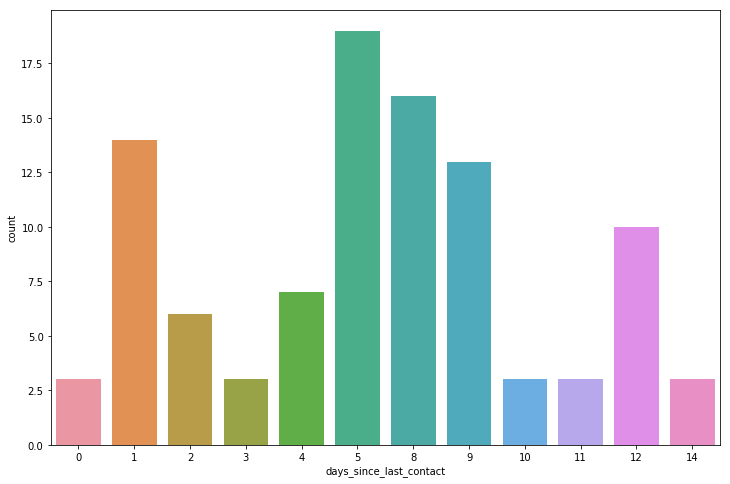

In [385]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="days_since_last_contact", data=data_sample)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000162FA120AC8>],
      dtype=object)

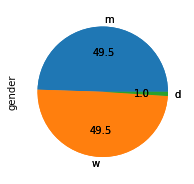

In [241]:
# Visualizing the object data as pie charts to see their destribution

#define Seaborn color palette to use

data_sample['gender'].value_counts().plot(kind='pie', autopct='%.1f', figsize=(5,3))


data_sample['gender'].value_counts().plot(kind='pie', subplots=True, autopct='%.1f', figsize=(5,3))


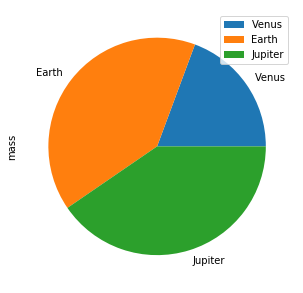

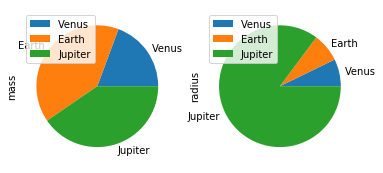

In [243]:
df = pd.DataFrame({'mass': [2.87, 5.97, 6.00],
                   'radius': [6051.8, 6378.1, 71492]},
                  index=['Venus', 'Earth', 'Jupiter'])
plot = df.plot.pie(y='mass', figsize=(5, 5))

plot = df.plot.pie(subplots=True, figsize=(6, 4))

In [124]:
# Checking general descriptive statistics of our dataframe

data_sample.describe()

,transactions,loyalty,days_since_last_contact,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.550000,-0.000090,6.280000,0.300000,0.220000,0.160000,0.320000
std,2.709411,1.002703,3.861438,0.460566,0.416333,0.368453,0.468826
min,1.000000,-1.710000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,-0.742500,3.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,-0.100500,5.000000,0.000000,0.000000,0.000000,0.000000
75%,8.250000,1.032500,9.000000,1.000000,0.000000,0.000000,1.000000
max,15.000000,1.400000,14.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
# Let's check what is the percentages of the values in each column

data_sample.gender.value_counts().sort_values(ascending = False)

w    48
m    48
d     1
Name: gender, dtype: int64

In [139]:
data_sample[['gender', 'delivery_pass']].apply(pd.Series.value_counts)

,gender,delivery_pass
d,1.0,NaN
m,48.0,NaN
w,48.0,NaN
True,NaN,52.0
False,NaN,48.0


**Now we can go through throught the names of the columns, make an assumptions of what they mean, ask some questions about them.**

- transactions - amount of transactions (purchases)
    - we have only 13 variations of the transcations
    
    
- loyalty - customer loyalty
    - we have **negative and positive loyalty**
    - <span style="color:blue">Q1. What does the negative and positive loyalty mean?</span>.
    
- days_since_last_contact - days since the customer was contacted
    - we have 14 days, **data about some days are missing**

- gender 3
- person_id 100
- product_ids 6
- 0ne.hot.1 2
- 0ne.hot.2 2
- 0ne.hot.3 2
- 0ne.hot.4 2
- promotion_set_id 100
- platform_cookie_source 1
- delivery_pass 2
- is_newsletter 1


In [9]:
def replace_space_and_capital(name):
    new_name = name.replace(' ', '_').lower()
    return new_name

data_sample = data_sample.rename(columns = replace_space_and_capital)

In [10]:
data_sample.product_ids.head()

0    [7881,10834,61603,62040,63288,125830]
1         [10834,61603,62040,63288,125830]
2                           [63288,125830]
3                             [7881,10834]
4          [7881,10834,62040,63288,125830]
Name: product_ids, dtype: object

In [11]:
data_sample.head()

,transactions,loyalty,days_since_last_contact,gender,person_id,product_ids,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4,promotion_set_id,platform_cookie_source,delivery_pass,is_newsletter
0,4,-1.33,2,m,170636bb-3601-4a18-b572-52650c0d2d0e,"[7881,10834,61603,62040,63288,125830]",1,0,0,0,042e2ace-0a6b-4983-811a-aa8c1aa3166a,web,True,True
1,6,-0.28,3,m,2a4c9697-b937-4429-9fd3-5529929a1ab9,"[10834,61603,62040,63288,125830]",1,0,0,0,745da0a4-b45f-4e40-b63f-fb5034927dd1,web,True,True
2,5,-0.22,1,w,4d12441d-3748-4b05-81bf-fd24f9f9d6f4,"[63288,125830]",1,0,0,0,cabe25fc-1fbb-43cf-b95c-f8a451630a61,web,False,True
3,7,-0.29,0,m,00f173be-96b1-4407-809c-6882e5bbb1fd,"[7881,10834]",0,1,0,0,5ffbd84f-f05e-4010-ac08-f29819c18d3f,web,True,True
4,4,1.06,5,m,f5aa1643-398f-4027-ab75-7b72ebe92d90,"[7881,10834,62040,63288,125830]",0,0,1,0,9fa195e5-8526-400d-9503-cf35f7abcd4c,web,True,True


In [12]:
user_df = data_sample[['product_ids', 'person_id']]
user_df.head(10)

,product_ids,person_id
0,"[7881,10834,61603,62040,63288,125830]",170636bb-3601-4a18-b572-52650c0d2d0e
1,"[10834,61603,62040,63288,125830]",2a4c9697-b937-4429-9fd3-5529929a1ab9
2,"[63288,125830]",4d12441d-3748-4b05-81bf-fd24f9f9d6f4
3,"[7881,10834]",00f173be-96b1-4407-809c-6882e5bbb1fd
4,"[7881,10834,62040,63288,125830]",f5aa1643-398f-4027-ab75-7b72ebe92d90
5,"[7881,10834,61603]",2d9f4985-6ec5-434a-867c-1763a311cdb0
6,"[10834,61603,62040,63288,125830]",6fbdb4cf-dde5-43ce-a6ea-b57956661221
7,"[10834,61603,62040,63288,125830]",8d9925cc-fc2e-4634-abbd-6a5847983d16
8,"[63288,125830]",2e6df752-71bd-4249-8484-57e73bc7cec8
9,"[7881,10834]",f246396d-85fc-4c54-a124-a85fa90aaa07


In [13]:
#products_sets = 
data_sample.groupby('product_ids', as_index = False).agg({'person_id' : 'count', 'transactions' : 'sum', 'days_since_last_contact' : 'mean'}).sort_values('person_id', ascending = False) \
    .rename(columns ={'person_id' : 'count'})

,product_ids,count,transactions,days_since_last_contact
0,"[10834,61603,62040,63288,125830]",18,142,5.222222
1,"[63288,125830]",18,109,7.722222
2,"[7881,10834,61603,62040,63288,125830]",18,134,6.166667
3,"[7881,10834,61603]",17,96,5.882353
5,"[7881,10834]",16,102,5.562500
4,"[7881,10834,62040,63288,125830]",13,72,7.307692


In [14]:
type(data_sample.product_ids[0])

str

In [15]:
from ast import literal_eval
len(literal_eval(data_sample.product_ids[0]))

6

In [92]:
buying_days = data_sample.groupby('days_since_last_contact', as_index = False).agg({'person_id' : 'count'})
#.sort_values('person_id', ascending = False) \
#    .rename(columns ={'person_id' : 'count_days'}).sort_values('days_since_last_contact')
buying_days

,days_since_last_contact,person_id
0,0,3
1,1,14
2,2,6
3,3,3
4,4,7
5,5,19
6,8,16
7,9,13
8,10,3
9,11,3


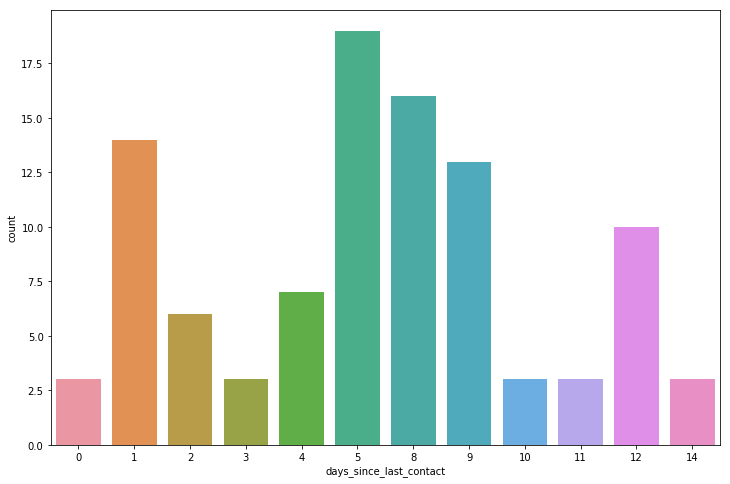

In [33]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="days_since_last_contact", data=data_sample)

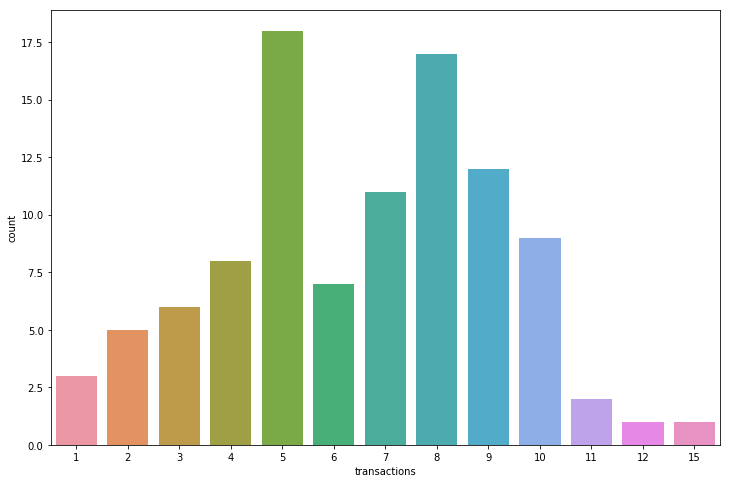

In [35]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="transactions", data=data_sample)

In [44]:
#products_sets = 
trans_sum_per_day = data_sample.groupby('days_since_last_contact', as_index = False).agg({'transactions' : 'sum'}).sort_values('transactions', ascending = False) \
    .rename(columns ={'transactions' : 'transactions_sum'}).sort_values('days_since_last_contact')
trans_sum_per_day.head()

,days_since_last_contact,transactions_sum
0,0,21
1,1,74
2,2,43
3,3,18
4,4,27


**Is there any trend between the days since last contacted and amount of transactions**

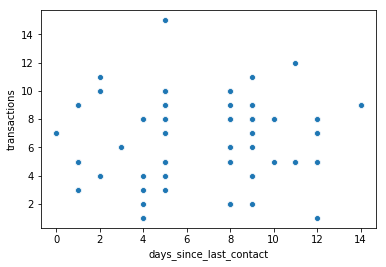

In [45]:
sns.scatterplot(data=data_sample, x="days_since_last_contact", y="transactions")
#here we see that the dates 6 and 7 are absent

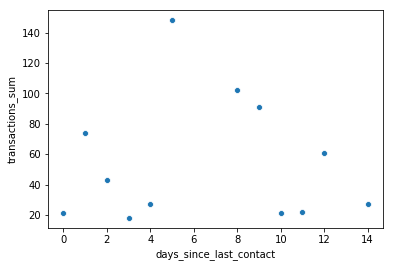

In [46]:
sns.scatterplot(data=trans_sum_per_day, x="days_since_last_contact", y="transactions_sum")

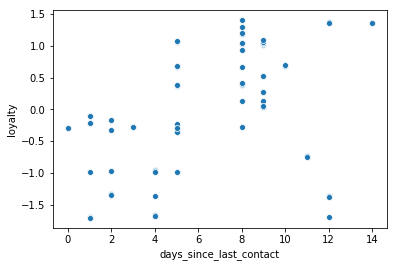

In [41]:
sns.scatterplot(data=data_sample, x="days_since_last_contact", y="loyalty")

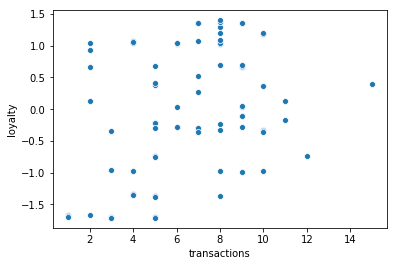

In [42]:
sns.scatterplot(data=data_sample, x="transactions", y="loyalty")

In [24]:
data_sample.groupby('days_since_last_contact', as_index = False).agg({'person_id' : 'count', 'transactions' : 'sum', 'count_product_ids' : 'sum'}).sort_values('person_id', ascending = False) \
    .rename(columns ={'person_id' : 'count_days'}).sort_values('days_since_last_contact')

,days_since_last_contact,count_days,transactions,count_product_ids
0,0,3,21,9
1,1,14,74,48
2,2,6,43,29
3,3,3,18,14
4,4,7,27,29
5,5,19,148,78
6,8,16,102,60
7,9,13,91,49
8,10,3,21,13
9,11,3,22,6


**Importing products data**

In [20]:
sheet_name2 = 'products'

url2 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name2}"

products=pd.read_csv(url2)
products.head()

,id,name,category_level_1,region,stock_level,is_seasonal,productdata_language
0,7881,mango,fruits,1,0,True,DE
1,10834,ovomaltine schokolade,sweets,2,3,False,DE
2,61603,nutella,sweets,2,3,False,DE
3,63288,birnen,fruits,1,0,True,DE
4,125830,karotten,vegetables,1,1,False,DE


**Merging products and data_sample tables**

In [90]:
l = list_fruits[0]
fruits[]
df['contains'] = df['text'].apply(lambda x: ','.join([i for i in l if i in x]))

In [71]:
list_fruits.iloc[:1]

,0,1,2,3,4,5
0,7881,10834,61603.0,62040.0,63288.0,125830.0


In [57]:
data_sample.list_product_ids.head()

0    [7881, 10834, 61603, 62040, 63288, 125830]
1          [10834, 61603, 62040, 63288, 125830]
2                               [63288, 125830]
3                                 [7881, 10834]
4           [7881, 10834, 62040, 63288, 125830]
Name: list_product_ids, dtype: object

In [ ]:
new_table = []
pd.DataFrame(np.sort((data_sample.list_product_ids.tolist(), index= data_sample.index), axis = 1), columns = data_sample.columns)

In [99]:
# Reading data as a pandas data frame.
# We have three tables: data_sample, products, person.

sheet_id = '1CrIcItzuVRaYz3g2V6adq7D1flsGM6zbVp9YS4mJz3s' 

sheet_name1 = 'data_sample'
sheet_name2 = 'products'
sheet_name3 = 'person'

url1 = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name1}"

data_sample=pd.read_csv(url1)
data_sample.head()

,transactions,loyalty,days_since_last_contact,gender,person_id,product_ids,0ne.hot.1,0ne.hot.2,0ne.hot.3,0ne.hot.4,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,4,-1.33,2,m,170636bb-3601-4a18-b572-52650c0d2d0e,"[7881,10834,61603,62040,63288,125830]",1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,-0.28,3,m,2a4c9697-b937-4429-9fd3-5529929a1ab9,"[10834,61603,62040,63288,125830]",1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,-0.22,1,w,4d12441d-3748-4b05-81bf-fd24f9f9d6f4,"[63288,125830]",1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,-0.29,0,m,00f173be-96b1-4407-809c-6882e5bbb1fd,"[7881,10834]",0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.06,5,m,f5aa1643-398f-4027-ab75-7b72ebe92d90,"[7881,10834,62040,63288,125830]",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
